In [45]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/colab datasets/Pokemon.csv'

Mounted at /content/gdrive


In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv(base_dir,index_col=0,encoding='latin1')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


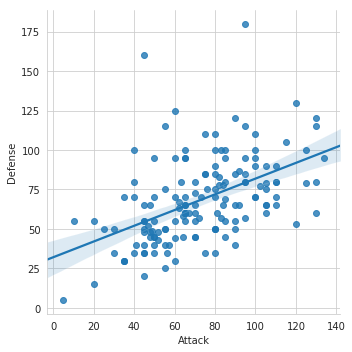

In [48]:
#comparing attack stats vs. defense stats
sns.lmplot(x='Attack', y='Defense', data=df)


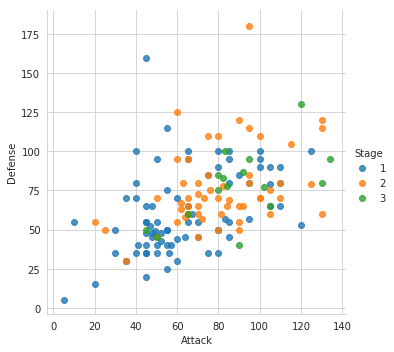

In [49]:
#hue allows addition of another dimension, fit_reg=False removes regression line
sns.lmplot('Attack','Defense',data = df,hue='Stage',fit_reg=False)


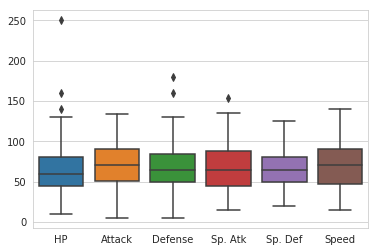

In [50]:
df_dropped = df.drop(['Total','Stage','Legendary'],axis=1)
sns.boxplot(data=df_dropped)
sns.set_style('whitegrid')

In [0]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

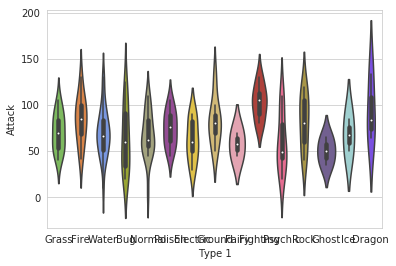

In [54]:
sns.violinplot(x = 'Type 1', y ='Attack',data=df,palette =pkmn_type_colors )

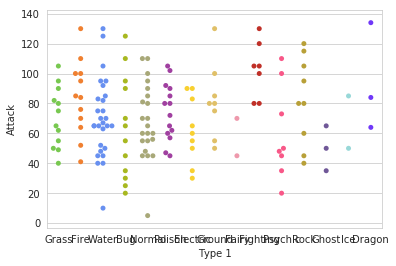

In [55]:
#swarm plots 
sns.swarmplot(x='Type 1', y ='Attack',data =df, palette = pkmn_type_colors)

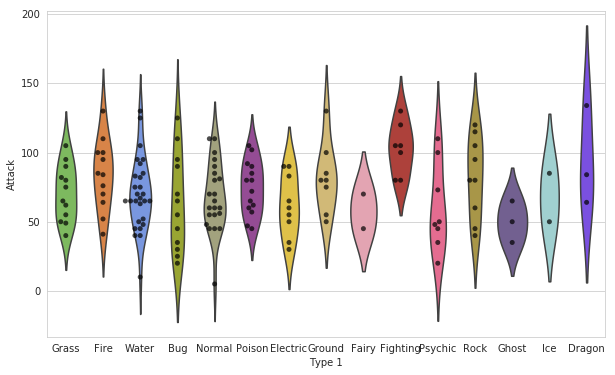

In [57]:
#swarm + violin plots
## figure size
plt.figure(figsize=(10,6))

sns.violinplot(x = 'Type 1', y ='Attack',inner=None,data=df,palette =pkmn_type_colors )
sns.swarmplot(x='Type 1', y ='Attack', data=df,color='black', alpha=0.7)

In [59]:
#melted dataframe
melted_df = pd.melt(df_dropped, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


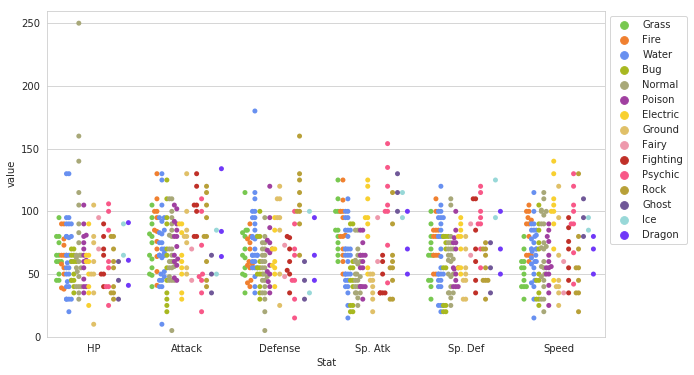

In [65]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

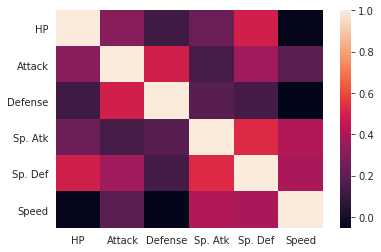

In [66]:
#heatmap
corr = df_dropped.corr()
sns.heatmap(corr)

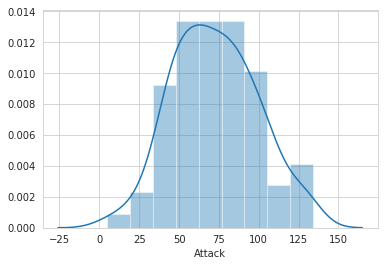

In [67]:
sns.distplot(df.Attack)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

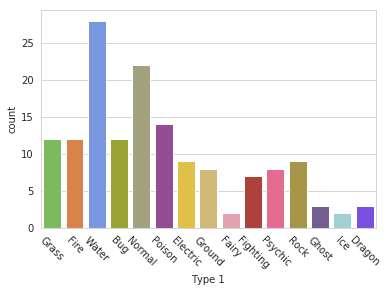

In [69]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


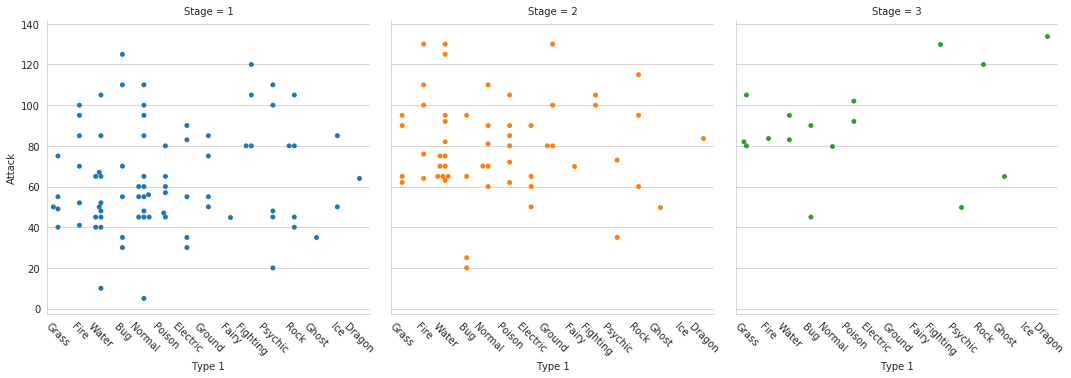

In [70]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

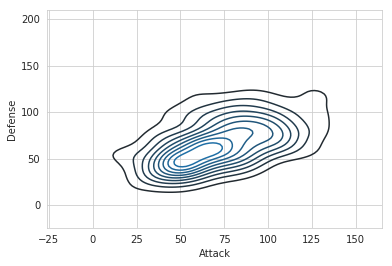

In [71]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

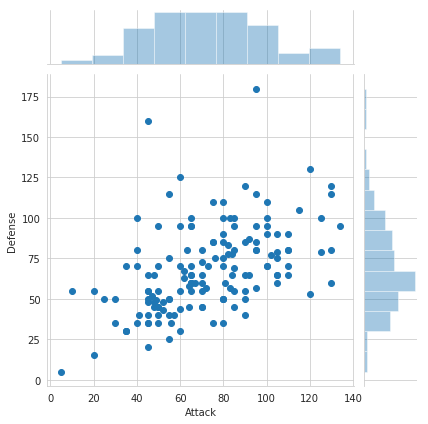

In [72]:
sns.jointplot(x='Attack', y='Defense', data=df)
